**Analisis Numérico**

Investigación previa 

In [7]:
#Punto 1
import numpy as np

# 1. Multiplicación de matrices
# Crear dos matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Multiplicación de matrices
C = np.dot(A, B)
print("Multiplicación de matrices A y B:\n", C)

# 2. Cálculo de la inversa de una matriz
# Crear una matriz
D = np.array([[1, 2], [3, 4]])

# Calcular la inversa de la matriz
D_inv = np.linalg.inv(D)
print("Inversa de la matriz D:\n", D_inv)

# 3. Cálculo de valores propios y vectores propios de una matriz
# Crear una matriz
E = np.array([[1, 2], [2, 1]])

# Calcular valores propios y vectores propios
valores_propios, vectores_propios = np.linalg.eig(E)
print("Valores propios de la matriz E:\n", valores_propios)
print("Vectores propios de la matriz E:\n", vectores_propios)

Multiplicación de matrices A y B:
 [[19 22]
 [43 50]]
Inversa de la matriz D:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Valores propios de la matriz E:
 [ 3. -1.]
Vectores propios de la matriz E:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


# **Parte 2: Aplicaciones Numéricas y Simbólicas**
***

### **1. Resolución de ecuaciones diferenciales (SymPy vs. SciPy)**

> *Toma una ecuación diferencial de la guía de trabajos prácticos y resuélvela usando **SymPy** y **SciPy** respectivamente. Compara los enfoques simbólico y
> numérico. ¿En qué casos preferirías usar uno u otro método?*

Vamos a resolver la siguiente ecuacion diferencial usando SymPy para obtener la solucion simbolica y SciPy para calcular la solucion numerica.

$y'' + 9y = e^t, y(0) = 0 ; y'(0) = 0$


#### **Solución Simbólica con SymPy**
En SymPy, resolveremos esta EDO de segundo orden usando `dsolve`, que permite encontrar soluciones exactas en términos de expresiones matemáticas.
#### **Paso a Paso en SymPy**
1. Definimos las variables simbólicas **𝑦** y **𝑡**
2. Planteamos la ecuación diferencial.
3. Aplicamos `dsolve` para resolver la ecuación.
4. Usamos las condiciones iniciales para obtener una solución particular.

Aquí está el código para hacerlo:

In [8]:
import sympy as sp

# Definimos la variable y la función desconocida
t = sp.symbols('t')
y = sp.Function('y')(t)

# Definimos la ecuación diferencial
ode = sp.Eq(y.diff(t, 2) + 9*y, sp.exp(t))

# Resolvemos la EDO simbólicamente
solucion_simb = sp.dsolve(ode, y)

# Aplicamos las condiciones iniciales y obtenemos la solución particular
constantes = sp.solve([solucion_simb.rhs.subs(t, 0), solucion_simb.rhs.diff(t).subs(t, 0)], 'C1', 'C2')
solucion_particular = solucion_simb.subs(constantes)

solucion_particular

Eq(y(t), exp(t)/10 - sin(3*t)/30 - cos(3*t)/10)

Este código te dará una solución exacta en términos de funciones y exponentes. La solución exacta, de este modo, resulta útil para el análisis detallado de la solución, encontrar patrones o analizar el comportamiento a medida que $t \to \infty$

#### **Solución Numérica con SciPy**
Para una solución numérica, usamos `solve_ivp` de **SciPy**, un método de integración numérica. En este enfoque, convertimos la EDO de segundo orden en un sistema de EDOs de primer orden:

Definimos:
* $y_1 = y$
* $y_2 = y'$

La EDO se convierte en:

* $y_1' = y_2$
* $y_2' = e^t - 9y_1$

Entonces podemos resolver este sistema de ecuaciones.

##### **Paso a Paso en SciPy**
1. Definimos el sistema de ecuaciones como una función.
2. Usamos `solve_ivp` para resolver la EDO numéricamente, aplicando las condiciones iniciales.

Aquí está el código para hacerlo:

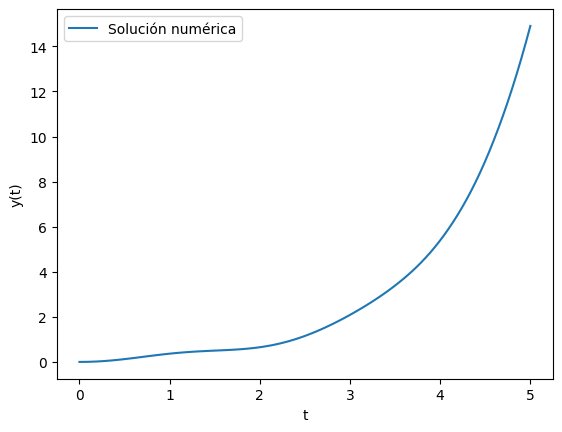

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definimos la función para el sistema de ecuaciones
def sistema(t, Y):
    y1, y2 = Y
    dy1_dt = y2
    dy2_dt = np.exp(t) - 9*y1
    return [dy1_dt, dy2_dt]

# Condiciones iniciales
Y0 = [0, 0]  # y(0) = 0, y'(0) = 0

# Intervalo de tiempo para la solución numérica
t_span = (0, 5)
t_eval = np.linspace(0, 5, 100)

# Resolvemos la EDO numéricamente
solucion_num = solve_ivp(sistema, t_span, Y0, t_eval=t_eval)

# Graficamos la solución numérica
plt.plot(solucion_num.t, solucion_num.y[0], label="Solución numérica")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

Este código mostrará una gráfica de la solución numérica en el intervalo de tiempo seleccionado.

### **Comparación de los Enfoques**
| Aspecto            | SymPy (Simbólico)                               | SciPy (Numérico)                                           |
|--------------------|-------------------------------------------------|------------------------------------------------------------|
| Resultado          | Expresión exacta                                | Valores numéricos en puntos discretos                      |
| Precisión          | Solución exacta (si es posible)                 | Aproximación numérica                                      |
| Aplicación         | Útil para análisis teórico                      | Útil para simulaciones o problemas con parámetros no conocidos |
| Limitaciones       | Requiere que SymPy pueda resolver la EDO        | Puede ser lento en problemas de alta complejidad o intervalos largos |
| Ejemplos de Uso    | Estudio de comportamiento asintótico, estabilidad | Simulaciones en ingeniería, física y biología              |

### **¿Cuándo usar uno u otro?**
* **SymPy (Simbólico)**: Es ideal cuando necesitas una solución general que puedas manipular algebraicamente o para estudios teóricos, ya que proporciona una expresión completa y exacta.
* **SciPy (Numérico)**: Es preferible cuando te enfrentas a ecuaciones complejas donde no se puede encontrar una solución simbólica o cuando estás interesado en una simulación que requiere eficiencia y precisión en puntos específicos.

___
### **2. Transformada de Laplace con SymPy**

> *Investiga cómo realizar la Transformada de Laplace utilizando SymPy. Explica el uso de las funciones laplace_transform e inverse_laplace_transform. ¿En qué
> aplicaciones prácticas crees que esta herramienta es útil?*

La Transformada de Laplace es una herramienta matemática poderosa que convierte una función en el dominio del tiempo en una función en el dominio de la frecuencia, lo que facilita el análisis de sistemas dinámicos, como circuitos eléctricos y sistemas mecánicos. En **SymPy**, podemos realizar tanto la Transformada de Laplace como su inversa (para volver al dominio del tiempo) usando las funciones `laplace_transform` y `inverse_laplace_transform`.

#### **Transformada de Laplace en SymPy**

La función laplace_transform en SymPy tiene la siguiente sintaxis: `sympy.laplace_transform(función, variable, variable_transformada)`

* `función`: Es la función en el dominio del tiempo que queremos transformar
* `variable`: Es la variable de la función en el dominio del tiempo, generalmente **𝑡**
* `variable_transformada`: Es la variable del dominio de la frecuencia, comúnmente **𝑠**

Esta función devuelve tres elementos:

1. La función transformada.
2. La región de convergencia (donde la transformada es válida).
3. Una bandera que indica si la transformada fue calculada.

**Ejemplo de Transformada de Laplace**

Supongamos que queremos encontrar la Transformada de Laplace de la función $f(t) = e^{3t} \sin(2t)$

In [ ]:
import sympy as sp

# Definimos la variable del tiempo y de la frecuencia
t, s = sp.symbols('t s')
f_t = sp.exp(3 * t) * sp.sin(2 * t)

# Calculamos la Transformada de Laplace
F_s = sp.laplace_transform(f_t, t, s)
F_s

Este código nos devuelve la expresión de la transformada en términos de **𝑠**.

#### **Transformada de Laplace Inversa en SymPy**

La Transformada de Laplace Inversa nos permite regresar una función del dominio de la frecuencia al dominio del tiempo. La función `inverse_laplace_transform` tiene esta sintaxis: `sympy.inverse_laplace_transform(función_transformada, variable_transformada, variable)`

* `función_transformada`: Es la función en el dominio de la frecuencia que queremos invertir.
* `variable_transformada`: Es la variable del dominio de la frecuencia, generalmente **𝑠**.
* `variable`: Es la variable en el dominio del tiempo, comúnmente **𝑡**

**Ejemplo de Transformada de Laplace Inversa**

Supongamos que queremos encontrar la Transformada de Laplace Inversa de la función

$F(s) = \frac{s + 3}{s^2 + 4}$

In [ ]:
# Definimos la función en el dominio de la frecuencia
F_s = (s + 3) / (s**2 + 4)

# Calculamos la Transformada de Laplace Inversa
f_t = sp.inverse_laplace_transform(F_s, s, t)
f_t

Este código devolverá una expresión en términos de **𝑡**, correspondiente a la función en el dominio del tiempo.

#### **Aplicaciones Prácticas de la Transformada de Laplace**

La Transformada de Laplace se usa en una amplia gama de aplicaciones, especialmente en el análisis de sistemas lineales y de control. Algunas aplicaciones específicas incluyen:

1. **Análisis de Sistemas de Control**: La Transformada de Laplace facilita el análisis de sistemas dinámicos, como sistemas eléctricos, mecánicos y de control, permitiendo resolver ecuaciones diferenciales y estudiar la respuesta de sistemas a diferentes entradas.

2. **Circuitos Eléctricos**: En la teoría de circuitos, la Transformada de Laplace ayuda a analizar la respuesta de circuitos RLC (resistor, inductor, capacitor) al pasar al dominio de la frecuencia, simplificando la resolución de sistemas complejos.

3. **Ingeniería Mecánica y Vibraciones**: En mecánica, es útil para analizar sistemas vibratorios, como masas y resortes, ya que permite estudiar las respuestas a fuerzas externas, amortiguamiento y resonancia.

4. **Resolución de Ecuaciones Diferenciales**: En matemáticas aplicadas y física, la Transformada de Laplace permite resolver ecuaciones diferenciales con condiciones iniciales complejas, como las que surgen en el modelado de sistemas.

#### **Resumen**

La Transformada de Laplace y su inversa en SymPy permiten resolver problemas simbólicamente, proporcionando soluciones exactas en el dominio de la frecuencia. Esto es particularmente útil para analizar sistemas donde las ecuaciones diferenciales son complejas y el tiempo es una variable clave, lo que simplifica el estudio de la estabilidad y la respuesta de los sistemas en el tiempo y facilita el diseño y análisis de sistemas de control.
___

### **3. Matrices simbólicas en SymPy** 

> *Explora la librería SymPy y describe cómo se construyen y manipulan matrices simbólicas. Proporciona ejemplos en los que las entradas de una matriz no sean
> números, sino variables simbólicas.*

La librería **SymPy** facilita la creación y manipulación de matrices simbólicas, permitiendo el trabajo con entradas que no necesariamente son valores numéricos, sino expresiones o variables simbólicas. Esto es muy útil en álgebra lineal simbólica, donde las matrices pueden representar sistemas de ecuaciones, transformaciones lineales, y otros cálculos que requieren soluciones generales en términos de variables.

#### **Creación de Matrices Simbólicas en SymPy**

En **SymPy**, las matrices simbólicas se crean utilizando la clase Matrix. Para crear una matriz con variables simbólicas, primero necesitamos definir las variables, y luego podemos construir la matriz con ellas.

**Ejemplo básico de creación de matriz simbólica**

Aquí crearemos una matriz ___A___ de 2x2 con variables simbólicas ___a, b, c y d___:

In [10]:
import sympy as sp

# Definimos las variables simbólicas
a, b, c, d = sp.symbols('a b c d')

# Creamos la matriz simbólica
A = sp.Matrix([[a, b], [c, d]])
A

Matrix([
[a, b],
[c, d]])

#### **Manipulación de Matrices Simbólicas**

Una vez creada la matriz simbólica, SymPy permite realizar diversas operaciones algebraicas, tales como calcular la **determinante**, **inversa**, **transpuesta**, y resolver sistemas lineales usando matrices simbólicas.

**Ejemplo de cálculo de la determinante**

Para calcular el determinante de la matriz ___A___:

In [11]:
det_A = A.det()
det_A

a*d - b*c

El resultado será una expresión en términos de ___a, b, c y d,___ si existe.

**jemplo de cálculo de la inversa**

Podemos calcular la inversa de la matriz ___A___, siempre y cuando su determinante no sea cero.

In [12]:
inv_A = A.inv()
inv_A

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

Esto devuelve la inversa de ___A___ en términos de ___a, b, c y d,___ si existe.

**Ejemplo de multiplicación de matrices**

Supongamos que tenemos otra matriz simbólica ___B___:

In [ ]:
# Definimos otra matriz simbólica
e, f, g, h = sp.symbols('e f g h')
B = sp.Matrix([[e, f], [g, h]])

# Multiplicamos A por B
C = A * B
C

El resultado será la matriz ___C___ obtenida al multiplicar 
___A___ y ___B___.

**Ejemplo Completo: Sistema de Ecuaciones Lineales Simbólico**

Supongamos que tenemos un sistema de ecuaciones lineales simbólico:
$$
\begin{cases}
ax + by = e \\
cx + dy = f
\end{cases}
$$
Podemos expresar este sistema en forma de matriz y resolverlo simbólicamente.



In [ ]:
# Creamos el vector de incógnitas y el vector de términos independientes
x, y = sp.symbols('x y')
variables = sp.Matrix([x, y])
constants = sp.Matrix([e, f])

# Escribimos el sistema en forma matricial: A * variables = constants
solution = A.LUsolve(constants)  # Resuelve el sistema
solution

Este código resuelve el sistema en términos de las variables ___a, b, c, d, e___ y ___f___, devolviendo los valores de ___x___ y ___y___ en función de estas.

#### **Resumen**

**SymPy** proporciona herramientas potentes para construir y manipular matrices simbólicas, permitiendo la resolución de sistemas de ecuaciones simbólicos y la ejecución de operaciones algebraicas complejas. Este enfoque es particularmente útil en matemáticas simbólicas, física teórica, y cualquier campo que requiera soluciones algebraicas en términos de variables.
___